In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import scipy as sc

# Checking out Data

In [63]:
df = pd.read_csv("./ml.csv")

In [64]:
df.head(10)

,gender,user,product,day,month,season,age group
0,1,45,3,Thursday,mar,spring,4
1,0,55,16,Saturday,apr,spring,4
2,0,11,9,Monday,jan,winter,4
3,0,60,2,Saturday,apr,spring,5
4,1,52,11,Saturday,may,summer,5
5,0,57,11,Wednesday,mar,spring,2
6,1,33,17,Saturday,may,summer,2
7,0,9,16,Sunday,may,summer,2
8,1,44,2,Tuesday,feb,winter,3
9,1,23,20,Saturday,apr,spring,3


# Mapping Str to Int - One Hot Encoding

In [65]:
season = {"spring":0,"summer":1,"winter":2}
day = {'Thursday':0, 'Saturday':1, 'Monday':2, 'Wednesday':3, 'Sunday':4, 'Tuesday':5,
       'Friday':6, 'monday':2}
month = {'mar':0, 'apr':1, 'jan':2, 'may':3, 'feb':4}      

In [66]:
df["season"] = df["season"].map(season)
df["day"] = df["day"].map(day)
df["month"] = df["month"].map(month)

In [67]:
df.head(5)

,gender,user,product,day,month,season,age group
0,1,45,3,0,0,0,4
1,0,55,16,1,1,0,4
2,0,11,9,2,2,2,4
3,0,60,2,1,1,0,5
4,1,52,11,1,3,1,5


In [68]:
x = df['product']
df = df.drop(['product'],axis=1)
df = df.drop(['user'],axis=1)
df = pd.concat([df,x],axis=1)
df.head(5)

,gender,day,month,season,age group,product
0,1,0,0,0,4,3
1,0,1,1,0,4,16
2,0,2,2,2,4,9
3,0,1,1,0,5,2
4,1,1,3,1,5,11


# Co-relation Matrix and Heatmaps

In [69]:
corrMatrix = df.corr()
print(corrMatrix)

             gender       day     month    season  age group   product
gender     1.000000  0.001081  0.003052 -0.001209  -0.019383 -0.117197
day        0.001081  1.000000  0.316136  0.176909   0.012699  0.004604
month      0.003052  0.316136  1.000000  0.792258   0.019039  0.024947
season    -0.001209  0.176909  0.792258  1.000000   0.006226  0.065523
age group -0.019383  0.012699  0.019039  0.006226   1.000000 -0.013798
product   -0.117197  0.004604  0.024947  0.065523  -0.013798  1.000000


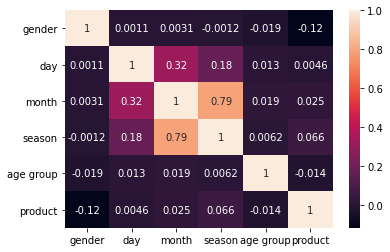

In [70]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [71]:
df.describe()

,gender,day,month,season,age group,product
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.523810,3.002268,2.004535,0.998866,3.009070,11.485261
std,0.499716,2.001133,1.417413,0.894553,1.428559,6.903445
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,0.000000,2.000000,6.000000
50%,1.000000,3.000000,2.000000,1.000000,3.000000,11.000000
75%,1.000000,5.000000,3.000000,2.000000,4.000000,17.000000
max,1.000000,6.000000,4.000000,2.000000,5.000000,24.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   gender     882 non-null    int64
 1   day        882 non-null    int64
 2   month      882 non-null    int64
 3   season     882 non-null    int64
 4   age group  882 non-null    int64
 5   product    882 non-null    int64
dtypes: int64(6)
memory usage: 41.5 KB


# Clustering

## Elbow method

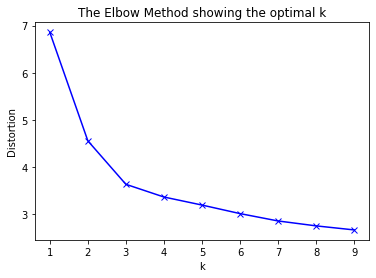

In [75]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Optimal K can be 4 or 5

# K-means Clustering

In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(df)

In [77]:
kmeans.labels_

array([3, 2, 1, 3, 1, 1, 2, 2, 3, 0, 1, 0, 1, 1, 3, 3, 2, 2, 0, 0, 3, 0,
       3, 3, 1, 2, 2, 1, 0, 0, 2, 1, 0, 0, 3, 2, 1, 3, 1, 3, 0, 0, 0, 2,
       2, 3, 3, 3, 1, 0, 2, 3, 3, 0, 3, 2, 2, 1, 2, 0, 0, 3, 3, 2, 0, 1,
       2, 1, 2, 3, 3, 2, 2, 1, 2, 1, 2, 2, 0, 3, 3, 2, 2, 0, 2, 1, 2, 3,
       1, 1, 0, 3, 0, 2, 2, 2, 3, 1, 1, 3, 2, 2, 3, 3, 0, 0, 1, 0, 3, 0,
       1, 3, 0, 3, 2, 3, 0, 1, 1, 3, 2, 3, 1, 3, 1, 1, 3, 2, 2, 2, 2, 0,
       3, 1, 0, 1, 2, 1, 1, 1, 2, 3, 3, 1, 2, 1, 3, 2, 0, 2, 0, 3, 3, 3,
       1, 2, 3, 1, 3, 3, 1, 0, 0, 0, 1, 3, 1, 0, 0, 2, 2, 3, 0, 1, 1, 3,
       0, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
       2, 3, 1, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 3, 2, 2, 2, 0, 1, 1, 0,
       3, 0, 3, 3, 2, 2, 1, 1, 2, 2, 3, 2, 1, 2, 0, 3, 1, 3, 3, 3, 0, 0,
       1, 1, 3, 2, 1, 2, 3, 0, 3, 3, 0, 2, 2, 3, 1, 0, 3, 0, 3, 2, 0, 2,
       0, 1, 1, 1, 0, 0, 1, 3, 2, 3, 0, 1, 1, 3, 0, 0, 3, 3, 3, 0, 3, 3,
       3, 1, 1, 0, 1, 2, 3, 3, 1, 2, 1, 0, 2, 3, 3,

In [78]:

predictions = kmeans.labels_
predictions=pd.DataFrame(predictions)

In [79]:
df['Clusters'] = predictions

In [80]:
df.head(10)

,gender,day,month,season,age group,product,Clusters
0,1,0,0,0,4,3,3
1,0,1,1,0,4,16,2
2,0,2,2,2,4,9,1
3,0,1,1,0,5,2,3
4,1,1,3,1,5,11,1
5,0,3,0,0,2,11,1
6,1,1,3,1,2,17,2
7,0,4,3,1,2,16,2
8,1,5,4,2,3,2,3
9,1,1,1,0,3,20,0


In [82]:
df['Clusters'].value_counts()

1    239
3    216
2    216
0    211
Name: Clusters, dtype: int64

# Visualization

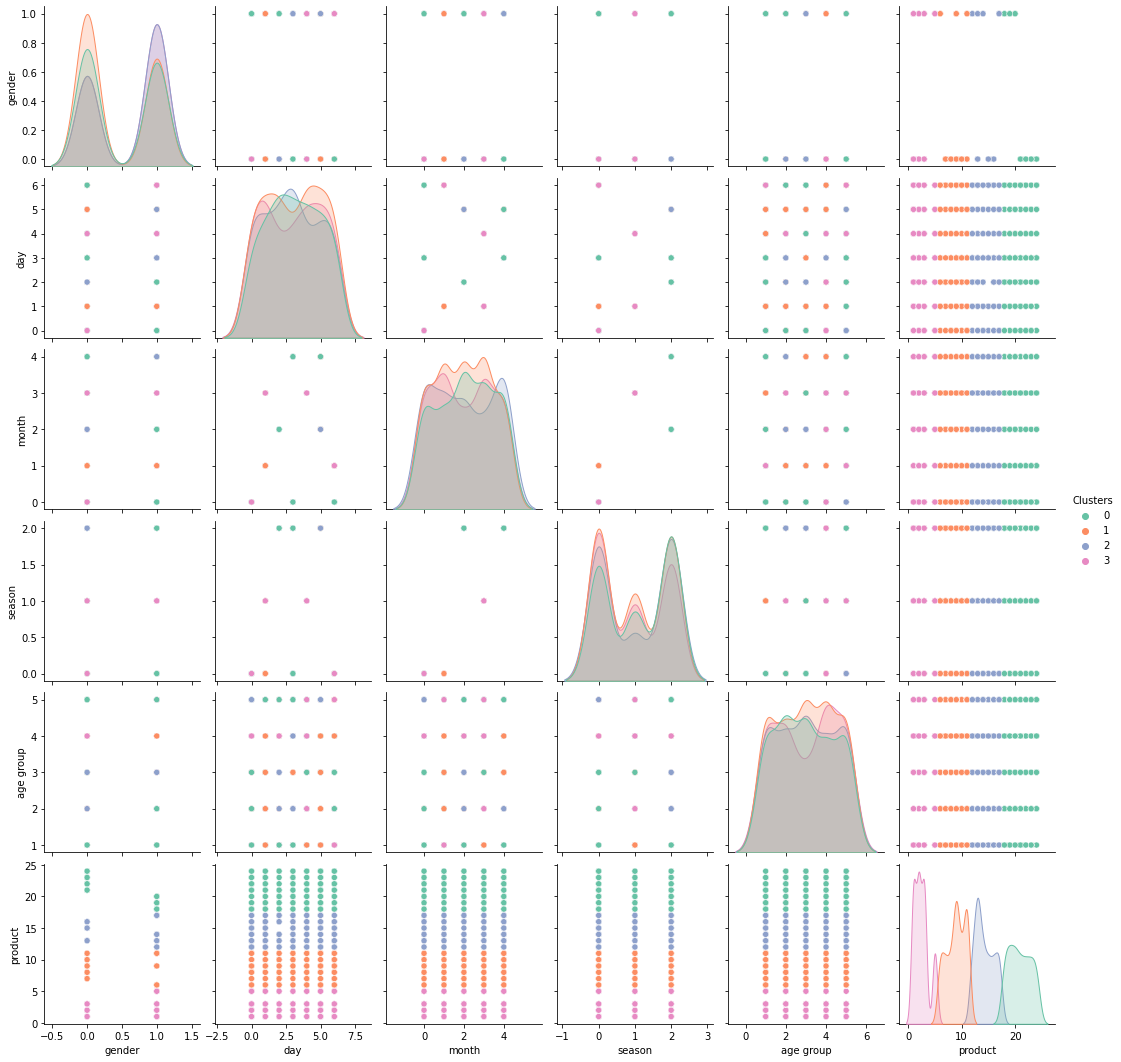

In [84]:
g = sns.pairplot(df, hue="Clusters", palette="Set2", diag_kind="kde", height=2.5)

Text(0.5, 1.0, 'PCA')

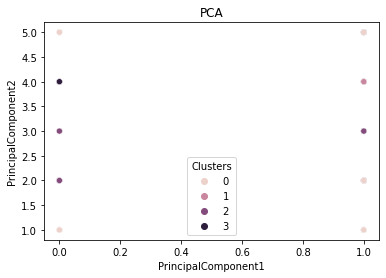

In [87]:
sns.scatterplot(data=df,x=df['gender'],y=df['age group'],hue='Clusters')
plt.xlabel("PrincipalComponent1")
plt.ylabel("PrincipalComponent2")
plt.title("PCA")

Text(0.5, 1.0, 'PCA')

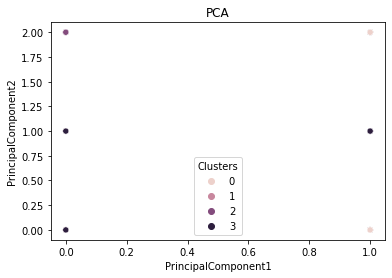

In [88]:
sns.scatterplot(data=df,x=df['gender'],y=df['season'],hue='Clusters')
plt.xlabel("PrincipalComponent1")
plt.ylabel("PrincipalComponent2")
plt.title("PCA")

Text(0.5, 1.0, 'PCA')

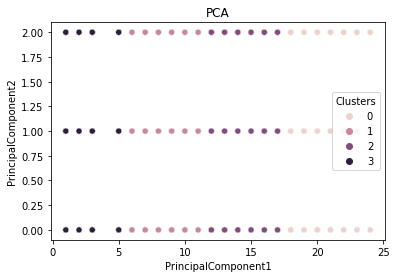

In [89]:
sns.scatterplot(data=df,x=df['product'],y=df['season'],hue='Clusters')
plt.xlabel("PrincipalComponent1")
plt.ylabel("PrincipalComponent2")
plt.title("PCA")

Text(0.5, 1.0, 'PCA')

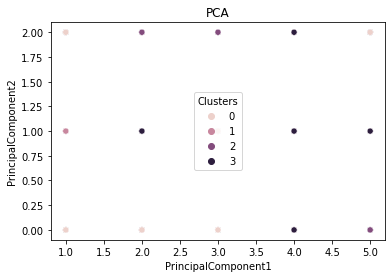

In [90]:
sns.scatterplot(data=df,x=df['age group'],y=df['season'],hue='Clusters')
plt.xlabel("PrincipalComponent1")
plt.ylabel("PrincipalComponent2")
plt.title("PCA")

In [91]:
df.head(20)

,gender,day,month,season,age group,product,Clusters
0,1,0,0,0,4,3,3
1,0,1,1,0,4,16,2
2,0,2,2,2,4,9,1
3,0,1,1,0,5,2,3
4,1,1,3,1,5,11,1
5,0,3,0,0,2,11,1
6,1,1,3,1,2,17,2
7,0,4,3,1,2,16,2
8,1,5,4,2,3,2,3
9,1,1,1,0,3,20,0


In [92]:
df.to_csv('./out.csv', index=False)